# Single Membership Data with Outliers

In this notebook, we show that RTKM performs competitively with existing methods on single-membership data with outliers. 



In [1]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *

import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA


# WBC Dataset

Load the Breast Cancer Wisconsin dataset.  This dataset contains 699 instances of tumors with 9 numerical at-tributes each. All of the instances are classified as either benignor malignant, of which we treat the latter as outliers.

In [2]:
data = np.zeros((699,8))
labels = np.zeros(699)

with open('datasets/breast-cancer-wisconsin.data') as myfile:
    reader = csv.reader(myfile)
    i=0
    for row in reader:
        labels[i] = row[10]
        temp = row[1:10]
        for elt in temp:
            if elt == '?':
                index = temp.index('?')
                temp[index] = 0
        data[i,:] = [int(j) for j in temp[1:10]]
        i+=1
        
inlier_ind = np.where(labels == 2)[0]
outlier_ind = np.where(labels == 4)[0]

true_labels = np.zeros((2,699))
true_labels[0,inlier_ind] = 1
true_labels[1,outlier_ind] = 1

Text(0.5, 1.0, 'WBC Data top 2 principal components')

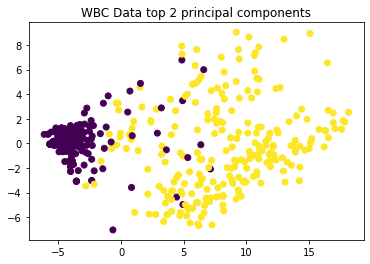

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(data)
Xnew = pca.transform(data)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:], c = labels)
plt.title('WBC Data top 2 principal components')


In [4]:
data = data.T

# Run RTKM



 Number of true positives:  [456, 223] 

 Number of false positives :  [241, 14] 

 Number of true negatives:  [0, 444] 

 Number of false negatives:  [2, 18] 

 F1 scores for each cluster:  [0.78961039 0.93305439] 

 Average F1 score:  0.8613323914579145 

 me score:  0.08070191913381292


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

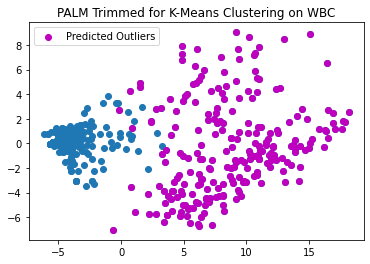

In [5]:
RTKM_WBC = RTKM(data)
RTKM_WBC.perform_clustering(k=1, percent_outliers = 0.34, max_iter = 500)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = RTKM_WBC.weights, pred_outliers = RTKM_WBC.outliers, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score: ', me)

pred_clusters, pred_outliers = RTKM_WBC.return_clusters()

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')




# Run KMOR



 Number of true positives:  [456, 223] 

 Number of false positives :  [241, 14] 

 Number of true negatives:  [0, 444] 

 Number of false negatives:  [2, 18] 

 F1 scores for each cluster:  [0.78961039 0.93305439] 

 Average F1 score:  0.8613323914579145 

 me score: 0.08070191913381292


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

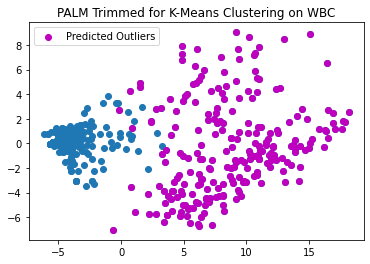

In [6]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=1, percent_outliers= 0.34, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')



# Run NEO

    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.340, betaN: 238


 Number of true positives:  [457, 0] 

 Number of false positives :  [241, 0] 

 Number of true negatives:  [0, 458] 

 Number of false negatives:  [1, 241] 

 F1 scores for each cluster:  [0.79065744 0.        ] 

 Average F1 score:  0.3953287197231834 

 me score:  1.0


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

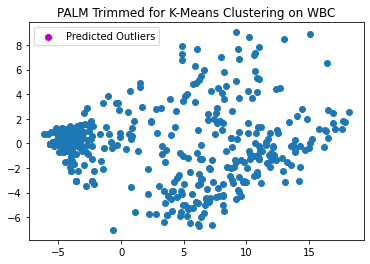

In [10]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_NEO='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=1, percent_outliers=0.34, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)

pred_outliers = np.where(pred_outliers_NEO == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')




# Test sensitivty of all three methods to alpha

In [11]:
alpha_vals = np.linspace(.25, .45, 10)

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=1, kmor_gamma= 1, 
                                                                                neo_sigma = 0, path_to_NEO='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 10, true_labels=true_labels,
                                                                                membership_option= 'single')
    
    

    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175


***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0


***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699


***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 43741.238913
***** iteration: 2, objective: 43741.238913


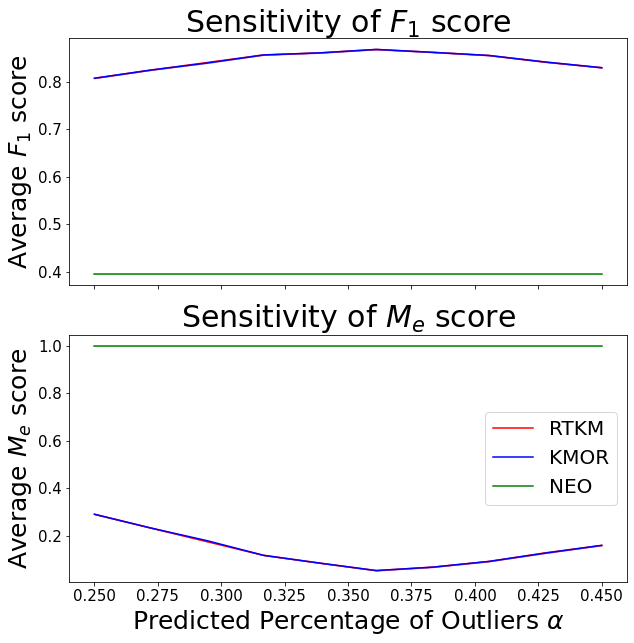

In [12]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)


# plt.savefig('wbc.pdf', format = 'pdf')

# Shuttle Dataset

In [13]:
import csv

data = np.zeros((43500,9))
label = np.zeros(43500)

with open('datasets/shuttle.trn') as myfile:
    reader = csv.reader(myfile, delimiter = ' ')
    i=0
    for row in reader:
        label[i] = row[9]
        data[i,:] = [int(j) for j in row[0:9]]
        i+=1

In [14]:
data = data.T
m,n = data.shape

In [15]:
temp_label = np.zeros(len(label))
np.copyto(temp_label, label[:])
unique_vals = np.unique(temp_label)

val = []
counts = []
for i in range(len(unique_vals)):
    counts.append(len(np.where(temp_label == unique_vals[i])[0]))
    val.append(counts[i]/len(temp_label))
print('percentage of points in cluster', val)
print('percent in top 3 clusters', val[0] + val[4] + val[3])
print('number of points in each cluster', counts)
print('number of outliers', counts[1] + counts[2] + counts[5] + counts[6])

true_outliers = np.zeros(1)
for i in [2,3,6,7]:
    true_outliers = np.hstack((true_outliers, np.where(temp_label==i)[0]))
true_outliers = (true_outliers[1:]).astype(int)

temp_label[true_outliers] = 6

k = 3

new_val = 0
true_label_vec = np.zeros(n)
for val in np.unique(temp_label):
    true_label_vec = np.where(temp_label == val, new_val, true_label_vec)
    new_val +=1
    
true_label = np.zeros((k+1, n))
true_label[true_label_vec.astype(int), np.arange(n)] = 1


percentage of points in cluster [0.7840919540229885, 0.0008505747126436781, 0.0030344827586206895, 0.1551264367816092, 0.05650574712643678, 0.00013793103448275863, 0.0002528735632183908]
percent in top 3 clusters 0.9957241379310344
number of points in each cluster [34108, 37, 132, 6748, 2458, 6, 11]
number of outliers 186


# Run RTKM

In [16]:
RTKM_shuttle = RTKM(data)
RTKM_shuttle.perform_clustering(k=3, percent_outliers = 0.05, max_iter = 500)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = RTKM_shuttle.weights, pred_outliers = RTKM_shuttle.outliers, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score: ', me)




 Number of true positives:  [25271, 2897, 15, 94] 

 Number of false positives :  [3668, 2782, 8865, 2150] 

 Number of true negatives:  [5724, 33970, 32177, 41164] 

 Number of false negatives:  [8837, 3851, 2443, 92] 

 F1 scores for each cluster:  [0.80165591 0.46624286 0.00264597 0.07736626] 

 Average F1 score:  0.33697774756019944 

 me score:  0.49710808224453534


# Run KMOR

In [17]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=3, percent_outliers= 0.05, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)



 Number of true positives:  [25571, 798, 2458, 122] 

 Number of false positives :  [2942, 7742, 3987, 2053] 

 Number of true negatives:  [6450, 29010, 37055, 41261] 

 Number of false negatives:  [8537, 5950, 0, 64] 

 F1 scores for each cluster:  [0.81669089 0.1043956  0.55217342 0.10334604] 

 Average F1 score:  0.3941514888353487 

 me score: 0.347335237524805


# Run NEO

In [18]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_NEO='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=3, percent_outliers=0.05, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)

    _pyeval at line 57 column 30

***** iteration: 1, objective: 32782745.486972
***** iteration: 2, objective: 27065890.005273
***** iteration: 3, objective: 25443039.082988
***** iteration: 4, objective: 24919950.890979
***** iteration: 5, objective: 24703277.474990
***** iteration: 6, objective: 24615550.133036
***** iteration: 7, objective: 24581743.759204
***** iteration: 8, objective: 24569171.317438
***** iteration: 9, objective: 24564459.542489
***** iteration: 10, objective: 24555760.691294
***** iteration: 11, objective: 24553946.049952
***** iteration: 12, objective: 24553556.707858
***** iteration: 13, objective: 24553494.301084
***** iteration: 14, objective: 24553478.409552
***** iteration: 15, objective: 24553472.936935
***** iteration: 16, objective: 24553471.416725
***** iteration: 17, objective: 24553471.230823
***** iteration: 18, objective: 24553471.152343
***** iteration: 19, objective: 24553471.152343
***** No. of iterations done: 19
***** Total no. of data points

# Test Sensitivity to alpha 

Included are the metrics obtained from the paper. 

In [21]:
alpha_vals = np.load('figure_data/alpha_vals_shuttle.npy')

me_avg_rtkm = np.load('figure_data/Me_avg_RTKM2.npy')
me_avg_kmor= np.load('figure_data/Me_avg_KMOR2.npy')
me_avg_neo = np.load('figure_data/Me_avg_NEO2.npy')

f1_avg_rtkm = np.load('figure_data/f1_avg_RTKM2.npy')
f1_avg_kmor = np.load('figure_data/f1_avg_KMOR2.npy')
f1_avg_neo = np.load('figure_data/f1_avg_NEO2.npy')

min_rtkm = np.load('figure_data/min_RTKM_shuttle2.npy')
max_rtkm = np.load('figure_data/max_RTKM_shuttle2.npy')

min_kmor = np.load('figure_data/min_KMOR_shuttle2.npy')
max_kmor = np.load('figure_data/max_KMOR_shuttle2.npy')

min_neo = np.load('figure_data/min_NEO_shuttle2.npy')
max_neo = np.load('figure_data/max_NEO_shuttle2.npy')

In [46]:
alpha_vals = np.linspace(0, 0.10, 11)

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=3, kmor_gamma= 9, 
                                                                                neo_sigma = 0, path_to_NEO='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 10, true_labels=true_label,
                                                                                membership_option= 'single')
    

    _pyeval at line 57 column 30

***** iteration: 1, objective: 1295390285.544154
***** iteration: 2, objective: 1295390285.544154
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

***** iteration: 1, objective: 1295392567.537597
***** iteration: 2, objective: 1295392567.537597
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

***** iteration: 1, objective: 1295223935.024777
***** iteration: 2, objective: 1295223935.024777
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

***** iteration: 1, objective: 1295215425.765942
***** iteration: 2, objective: 1295215425.765942
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000

***** iteration: 9, objective: 31531352.731817
***** iteration: 10, objective: 31531352.731817
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 435
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 32428869.274336
***** iteration: 2, objective: 31533240.225481
***** iteration: 3, objective: 31531466.713766
***** iteration: 4, objective: 31531444.566915
***** iteration: 5, objective: 31531436.105285
***** iteration: 6, objective: 31531381.850872
***** iteration: 7, objective: 31531356.552325
***** iteration: 8, objective: 31531353.141777
***** iteration: 9, objective: 31531352.731817
***** iteration: 10, objective: 31531352.731817
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 435
    _pyeval at line 57 col

***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 870
    _pyeval at line 57 column 30

***** iteration: 1, objective: 29980232.581835
***** iteration: 2, objective: 29000788.762101
***** iteration: 3, objective: 28998192.476320
***** iteration: 4, objective: 28997839.566760
***** iteration: 5, objective: 28997677.855011
***** iteration: 6, objective: 28997509.940074
***** iteration: 7, objective: 28997449.097591
***** iteration: 8, objective: 28997430.523643
***** iteration: 9, objective: 28997398.647412
***** iteration: 10, objective: 28997389.804915
***** iteration: 11, objective: 28997387.828153
***** iteration: 12, objective: 28997387.596488
***** iteration: 13, objective: 28997386.373937
***** iteration: 14, objective: 28997386.373937
***** No. of iterations done: 14
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 870
    _pyeval at line 57 column 30

***** iteration: 1, objective: 29980232.

***** No. of iterations done: 16
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 1305
    _pyeval at line 57 column 30

***** iteration: 1, objective: 28395300.886949
***** iteration: 2, objective: 27322493.629368
***** iteration: 3, objective: 27302518.929070
***** iteration: 4, objective: 27300369.430735
***** iteration: 5, objective: 27300156.357004
***** iteration: 6, objective: 27300141.110173
***** iteration: 7, objective: 27300139.006616
***** iteration: 8, objective: 27300139.006616
***** No. of iterations done: 8
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 1305
    _pyeval at line 57 column 30

***** iteration: 1, objective: 28605623.435325
***** iteration: 2, objective: 27374112.439159
***** iteration: 3, objective: 27355496.569669
***** iteration: 4, objective: 27337052.638580
***** iteration: 5, objective: 27314806.546867
***** iteration: 6, objective: 27309123.352357
***** itera

***** iteration: 8, objective: 25749872.392227
***** iteration: 9, objective: 25736517.592663
***** iteration: 10, objective: 25734494.198207
***** iteration: 11, objective: 25733851.724583
***** iteration: 12, objective: 25733602.165778
***** iteration: 13, objective: 25733300.183091
***** iteration: 14, objective: 25732731.750094
***** iteration: 15, objective: 25731635.846144
***** iteration: 16, objective: 25727278.619780
***** iteration: 17, objective: 25720471.760623
***** iteration: 18, objective: 25718404.223019
***** iteration: 19, objective: 25718022.402583
***** iteration: 20, objective: 25717906.608618
***** iteration: 21, objective: 25717807.500466
***** iteration: 22, objective: 25717709.982162
***** iteration: 23, objective: 25717618.440019
***** iteration: 24, objective: 25717583.652887
***** iteration: 25, objective: 25717576.703298
***** iteration: 26, objective: 25717575.284190
***** iteration: 27, objective: 25717573.644527
***** iteration: 28, objective: 25717571.0

***** iteration: 25, objective: 25717576.703298
***** iteration: 26, objective: 25717575.284190
***** iteration: 27, objective: 25717573.644527
***** iteration: 28, objective: 25717571.010738
***** iteration: 29, objective: 25717567.966721
***** iteration: 30, objective: 25717567.096402
***** iteration: 31, objective: 25717566.739658
***** iteration: 32, objective: 25717566.739658
***** No. of iterations done: 32
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 1740
    _pyeval at line 57 column 30

***** iteration: 1, objective: 27272126.739367
***** iteration: 2, objective: 25936465.405673
***** iteration: 3, objective: 25846099.248754
***** iteration: 4, objective: 25789205.387214
***** iteration: 5, objective: 25776741.666658
***** iteration: 6, objective: 25773354.135253
***** iteration: 7, objective: 25771006.190608
***** iteration: 8, objective: 25759937.883679
***** iteration: 9, objective: 25738338.896124
***** iteration: 10, object

    _pyeval at line 57 column 30

***** iteration: 1, objective: 26533448.430330
***** iteration: 2, objective: 25075026.450186
***** iteration: 3, objective: 24896440.591549
***** iteration: 4, objective: 24794526.100167
***** iteration: 5, objective: 24698352.702717
***** iteration: 6, objective: 24637442.534935
***** iteration: 7, objective: 24596952.479565
***** iteration: 8, objective: 24573963.257191
***** iteration: 9, objective: 24569444.291989
***** iteration: 10, objective: 24562956.031847
***** iteration: 11, objective: 24555028.442602
***** iteration: 12, objective: 24553749.597021
***** iteration: 13, objective: 24553548.324163
***** iteration: 14, objective: 24553491.297614
***** iteration: 15, objective: 24553477.547341
***** iteration: 16, objective: 24553472.483357
***** iteration: 17, objective: 24553471.416725
***** iteration: 18, objective: 24553471.230823
***** iteration: 19, objective: 24553471.152343
***** iteration: 20, objective: 24553471.152343
***** No. of it

***** iteration: 16, objective: 24553472.483357
***** iteration: 17, objective: 24553471.416725
***** iteration: 18, objective: 24553471.230823
***** iteration: 19, objective: 24553471.152343
***** iteration: 20, objective: 24553471.152343
***** No. of iterations done: 20
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 26159887.846121
***** iteration: 2, objective: 24850523.168424
***** iteration: 3, objective: 24766671.441750
***** iteration: 4, objective: 24680364.909332
***** iteration: 5, objective: 24630394.544085
***** iteration: 6, objective: 24594740.457953
***** iteration: 7, objective: 24573432.053479
***** iteration: 8, objective: 24569264.666787
***** iteration: 9, objective: 24562915.361921
***** iteration: 10, objective: 24555028.442602
***** itera

    _pyeval at line 57 column 30

***** iteration: 1, objective: 25515953.365955
***** iteration: 2, objective: 24169349.266204
***** iteration: 3, objective: 23995838.407693
***** iteration: 4, objective: 23850323.277693
***** iteration: 5, objective: 23745947.493710
***** iteration: 6, objective: 23691302.578254
***** iteration: 7, objective: 23673164.853831
***** iteration: 8, objective: 23643469.357617
***** iteration: 9, objective: 23629292.929330
***** iteration: 10, objective: 23627223.852541
***** iteration: 11, objective: 23626390.215434
***** iteration: 12, objective: 23626193.954745
***** iteration: 13, objective: 23626161.431576
***** iteration: 14, objective: 23626146.897584
***** iteration: 15, objective: 23626139.951538
***** iteration: 16, objective: 23626138.497643
***** iteration: 17, objective: 23626138.410955
***** iteration: 18, objective: 23626136.103447
***** iteration: 19, objective: 23626128.293394
***** iteration: 20, objective: 23626107.783094
***** iteration

***** iteration: 4, objective: 23811770.716396
***** iteration: 5, objective: 23707170.372532
***** iteration: 6, objective: 23682426.878672
***** iteration: 7, objective: 23657634.040099
***** iteration: 8, objective: 23632805.108675
***** iteration: 9, objective: 23627884.455101
***** iteration: 10, objective: 23626710.610437
***** iteration: 11, objective: 23626257.069416
***** iteration: 12, objective: 23626175.735594
***** iteration: 13, objective: 23626154.457404
***** iteration: 14, objective: 23626143.428439
***** iteration: 15, objective: 23626138.989933
***** iteration: 16, objective: 23626138.410955
***** iteration: 17, objective: 23626136.103447
***** iteration: 18, objective: 23626128.293394
***** iteration: 19, objective: 23626107.783094
***** iteration: 20, objective: 23626089.679318
***** iteration: 21, objective: 23626075.203516
***** iteration: 22, objective: 23626067.462756
***** iteration: 23, objective: 23626065.458524
***** iteration: 24, objective: 23626065.21257

***** iteration: 9, objective: 22533442.374583
***** iteration: 10, objective: 22512292.174831
***** iteration: 11, objective: 22510838.613119
***** iteration: 12, objective: 22510353.585380
***** iteration: 13, objective: 22510134.759162
***** iteration: 14, objective: 22509930.635909
***** iteration: 15, objective: 22509815.121834
***** iteration: 16, objective: 22509752.359724
***** iteration: 17, objective: 22509710.977027
***** iteration: 18, objective: 22509694.269598
***** iteration: 19, objective: 22509686.582101
***** iteration: 20, objective: 22509683.991719
***** iteration: 21, objective: 22509681.994244
***** iteration: 22, objective: 22509680.896700
***** iteration: 23, objective: 22509679.893560
***** iteration: 24, objective: 22509679.235562
***** iteration: 25, objective: 22509678.842603
***** iteration: 26, objective: 22509678.750198
***** iteration: 27, objective: 22509678.742216
***** iteration: 28, objective: 22509678.742216
***** No. of iterations done: 28
***** To

/Users/olgadorabiala/Documents/ThesisResearch/PALM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

***** iteration: 1, objective: 35175057.793019
***** iteration: 2, objective: 32034954.981276
***** iteration: 3, objective: 31653201.076674
***** iteration: 4, objective: 31553496.968977
***** iteration: 5, objective: 31540676.052562
***** iteration: 6, objective: 31536809.384112
***** iteration: 7, objective: 31536051.418985
***** iteration: 8, objective: 31535763.710653
***** iteration: 9, objective: 31535693.563991
***** iteration: 10, objective: 31535683.374779
***** iteration: 11, objective: 31535682.107020
***** iteration: 12, objective: 31535681.349550
***** iteration: 13, objective: 31535681.139024
***** iteration: 14, objective: 31535681.139024
***** No. of iterations done: 14
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 3045
    _pyeval at line 57 column 30

***** iteration: 1, objective: 25726508.999967
***** iteration: 2, objective: 24107420.274399
***** iteration: 3, objective: 23844137.852

***** iteration: 15, objective: 21548461.338352
***** iteration: 16, objective: 21548427.160117
***** iteration: 17, objective: 21548418.811203
***** iteration: 18, objective: 21548416.198398
***** iteration: 19, objective: 21548415.234613
***** iteration: 20, objective: 21548414.807388
***** iteration: 21, objective: 21548414.755398
***** iteration: 22, objective: 21548414.393999
***** iteration: 23, objective: 21548414.344544
***** iteration: 24, objective: 21548414.344544
***** No. of iterations done: 24
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 3480
    _pyeval at line 57 column 30

***** iteration: 1, objective: 24177556.479224
***** iteration: 2, objective: 22549228.832912
***** iteration: 3, objective: 22185520.761256
***** iteration: 4, objective: 21989860.899836
***** iteration: 5, objective: 21844216.114631
***** iteration: 6, objective: 21697488.885010
***** iteration: 7, objective: 21649085.223262
***** iteration: 8, objec

    _pyeval at line 57 column 30

***** iteration: 1, objective: 24075686.084921
***** iteration: 2, objective: 22477998.090627
***** iteration: 3, objective: 22137072.012881
***** iteration: 4, objective: 21940591.730849
***** iteration: 5, objective: 21825866.429420
***** iteration: 6, objective: 21688683.023822
***** iteration: 7, objective: 21640537.817420
***** iteration: 8, objective: 21564349.536723
***** iteration: 9, objective: 21553841.316351
***** iteration: 10, objective: 21550416.851657
***** iteration: 11, objective: 21549075.640763
***** iteration: 12, objective: 21548682.668644
***** iteration: 13, objective: 21548601.439892
***** iteration: 14, objective: 21548526.785830
***** iteration: 15, objective: 21548461.338352
***** iteration: 16, objective: 21548427.160117
***** iteration: 17, objective: 21548418.811203
***** iteration: 18, objective: 21548416.198398
***** iteration: 19, objective: 21548415.234613
***** iteration: 20, objective: 21548414.807388
***** iteration

***** iteration: 20, objective: 20698350.245035
***** iteration: 21, objective: 20698302.645932
***** iteration: 22, objective: 20698275.570834
***** iteration: 23, objective: 20698205.020434
***** iteration: 24, objective: 20698144.729731
***** iteration: 25, objective: 20698114.644111
***** iteration: 26, objective: 20698100.610719
***** iteration: 27, objective: 20698085.789054
***** iteration: 28, objective: 20698073.759719
***** iteration: 29, objective: 20698061.524086
***** iteration: 30, objective: 20698057.031406
***** iteration: 31, objective: 20698055.943286
***** iteration: 32, objective: 20698055.343206
***** iteration: 33, objective: 20698054.672172
***** iteration: 34, objective: 20698053.735144
***** iteration: 35, objective: 20698053.483583
***** iteration: 36, objective: 20698053.483583
***** No. of iterations done: 36
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 3915
    _pyeval at line 57 column 30

***** iteration: 1

***** iteration: 31, objective: 20698055.943286
***** iteration: 32, objective: 20698055.343206
***** iteration: 33, objective: 20698054.672172
***** iteration: 34, objective: 20698053.735144
***** iteration: 35, objective: 20698053.483583
***** iteration: 36, objective: 20698053.483583
***** No. of iterations done: 36
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 3915
    _pyeval at line 57 column 30

***** iteration: 1, objective: 23357157.522382
***** iteration: 2, objective: 21707946.192114
***** iteration: 3, objective: 21375999.160747
***** iteration: 4, objective: 21158591.066547
***** iteration: 5, objective: 20945929.203027
***** iteration: 6, objective: 20816294.503172
***** iteration: 7, objective: 20781565.883110
***** iteration: 8, objective: 20743382.867155
***** iteration: 9, objective: 20718433.888124
***** iteration: 10, objective: 20709346.110622
***** iteration: 11, objective: 20704443.325788
***** iteration: 12, object

***** No. of iterations done: 34
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

***** iteration: 1, objective: 25382991.558045
***** iteration: 2, objective: 23050831.958749
***** iteration: 3, objective: 22364352.248859
***** iteration: 4, objective: 22034382.566983
***** iteration: 5, objective: 21866613.412544
***** iteration: 6, objective: 21763007.405147
***** iteration: 7, objective: 21605987.313191
***** iteration: 8, objective: 21315670.575177
***** iteration: 9, objective: 20853871.031878
***** iteration: 10, objective: 20557402.672913
***** iteration: 11, objective: 20322232.584979
***** iteration: 12, objective: 20132295.132652
***** iteration: 13, objective: 20042729.082410
***** iteration: 14, objective: 19983554.147543
***** iteration: 15, objective: 19963250.633788
***** iteration: 16, objective: 19952229.905970
***** iteration: 17, objective: 19946825.877245
***** iteration: 18, object

***** iteration: 30, objective: 19941331.449603
***** iteration: 31, objective: 19941331.244196
***** iteration: 32, objective: 19941330.941250
***** iteration: 33, objective: 19941330.774357
***** iteration: 34, objective: 19941330.774357
***** No. of iterations done: 34
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

***** iteration: 1, objective: 33288884.341640
***** iteration: 2, objective: 27825605.096263
***** iteration: 3, objective: 26685164.041403
***** iteration: 4, objective: 25950282.865957
***** iteration: 5, objective: 25408735.116285
***** iteration: 6, objective: 25229738.255480
***** iteration: 7, objective: 25162095.916269
***** iteration: 8, objective: 25150500.266124
***** iteration: 9, objective: 25148127.533728
***** iteration: 10, objective: 25147550.109741
***** iteration: 11, objective: 25147460.297470
***** iteration: 12, objective: 25147446.949793
***** iteration: 13, object

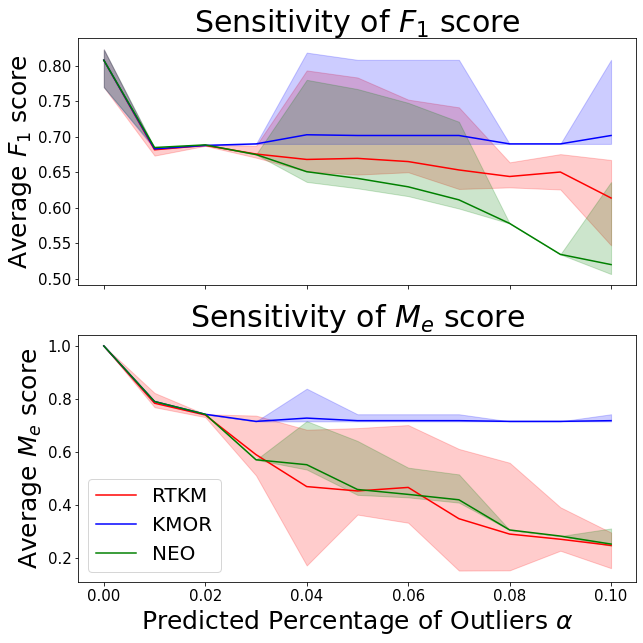

In [20]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)